**Task:** Replicate the experiment of the example 2.8 of the book Learning from Data.

**Example 2.8 statement:** Consider a target function $f(x) = \sin (\pi x)$ and a data set of size $N = 2$. We sample $x$ uniformly in $[-1, 1]$, to generate a data set $(x_{1}, y_{1}), (x_{2}, y_{2})$; and fit the data using one of the two models:
- $H_{0}$: set of all lines of the form $h(x)=b$,
- $H_{1}$: set of all lines of the form $h(x)=ax+b$.

For $H_{0}$, we choose the constant hypothesis that best fits the data (the horizontal line at the midpoint, $b=\frac{y_{1}+y_{2}}{2}$). For $H_{1}$, we choose the line that passes through the two data points $(x_{1}, y_{1}), (x_{2}, y_{2})$. For both models we will calculate the bias and the variance.

## Experiment

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define f(x) = sin(pi*x) function
def f(x):    
    y = math.sin(math.pi*x)
    return y

In [3]:
# Sampling data points in the interval [-1,1]
np.random.seed(5)
x_1 = np.random.uniform(-1,1,99)
x_2 = np.random.uniform(-1,1,100)
x_1 = np.append(x_1, [1])
y_1 = [f(x) for x in x_1]
y_2 = [f(x) for x in x_2]

# Case 1 (H0 is a constant function := b)

In [5]:
# Table 1 correspond to the first case where the function estimate, H0, for f(x) is the line b = (y1+y2)/2
table_1 = pd.DataFrame(list(zip(x_1, y_1, x_2, y_2)),
                       columns =['x_1', 'y_1', 'x_2', 'y_2'])

In [6]:
# Create H0
table_1['H0'] = (table_1['y_1'] + table_1['y_2'])/2

In [8]:
# We calculate the average hypothesis g0
g0 = table_1.loc[:, 'H0'].mean()

In [10]:
# Calculate bias for each point
table_1['bias'] = ((g0-table_1['y_1'])**2)+((g0-table_1['y_2'])**2)

In [98]:
# The bias column we created is pointwise, we need to calculate the total bias for the complete set of points
bias0 = table_1['bias'].sum()/(2*len(table_1))
print(r"The bias for H0 is %.4f"%bias0)

The bias for H0 is 0.4822


In [12]:
# Calculate the difference between H0 and g0
table_1['difference'] = (2*(g0-table_1['H0'])**2)/2

In [99]:
# The difference calculation is going to help us in calculating the variance
variance0 = table_1['difference'].sum()/len(table_1)
print(r"The variance for H0 is %.4f"%variance0)

The variance for H0 is 0.2455


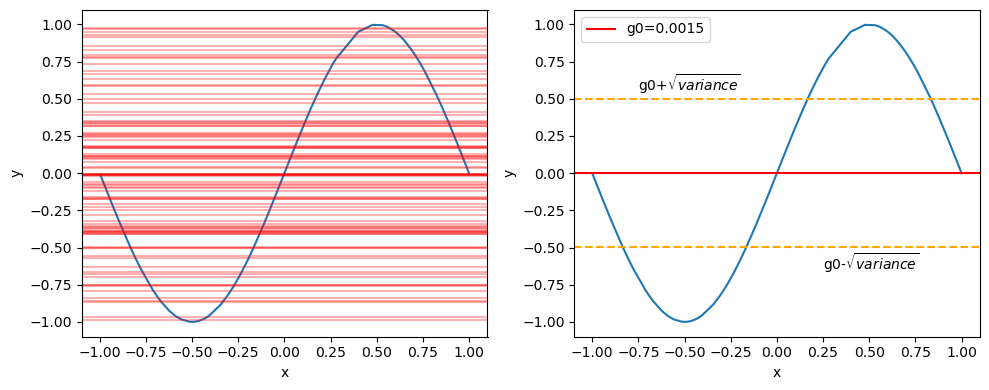

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plot1 = sns.lineplot(data=table_1, x='x_1', y='y_1', ax=ax[0])
for i in table_1['H0']:
    plot1.axhline(i, color='r', alpha=0.3)
    
plot2 = sns.lineplot(data=table_1, x='x_1', y='y_1', label='_nolegend_', ax=ax[1])
plot2.axhline(g0, color='r', label='g0=%.4f'%g0)
plot2.axhline(g0+math.sqrt(variance0), color='orange', linestyle = '--')
plot2.axhline(g0-math.sqrt(variance0), color='orange', linestyle = '--')

ax[1].text(-0.75, 0.55, r'g0+$\sqrt{variance}$', fontsize=10)
ax[1].text(0.25, -0.65, r'g0-$\sqrt{variance}$', fontsize=10)
ax[0].set_xlabel(r'x')
ax[0].set_ylabel(r'y')
ax[1].set_xlabel(r'x')
ax[1].set_ylabel(r'y')
ax[1].legend()
fig.tight_layout()
plt.show()

As we expected, since $H_{0}$ is a simple model, it has high bias (the average hypothesis $g0$ is not a good estimate for $f(x)$) but low variance (the functions in the hypothesis set are not that different from each other).

# Case 2 (H1 is a line:= ax+b)

In [100]:
# Table 2 correspond to the second case where the function estimate, H1, for f(x) is the line that passes through the two
# data points (x1, y1) and (x2, y2)
table_2 = pd.DataFrame(list(zip(x_1, y_1, x_2, y_2)),
                       columns =['x_1', 'y_1', 'x_2', 'y_2'])

In [101]:
# Here we calculate the parameters of the line passing through two points
m = []
b = []

for _, row in table_2.iterrows():
    coefficients = np.polyfit([row[0],row[2]], [row[1],row[3]], 1)
    m.append(coefficients[0])
    b.append(coefficients[1])

In [102]:
table_2['m'] = m
table_2['b'] = b

In [103]:
# Let's calculate the average line
g1 = [table_2.loc[:, 'm'].mean(), table_2.loc[:, 'b'].mean()]
table_2['g1_1'] = g1[0]*table_2['x_1'] + g1[1]  # Here we calculate the value of x_1 by the average line
table_2['g1_2'] = g1[0]*table_2['x_2'] + g1[1]  # Here we calculate the value of x_2 by the average line

In [104]:
# Let's calculate the bias
table_2['bias'] = ((table_2['g1_1']-table_2['y_1'])**2)+((table_2['g1_2']-table_2['y_2'])**2)

In [106]:
# The bias column we created is pointwise, we need to calculate the total bias for the complete set of points
bias1 = table_2['bias'].sum()/(2*len(table_2))
print(r"The bias for H1 is %.4f"%bias1)

The bias for H1 is 0.2113


In [107]:
# Calculate the difference between H1 and g1
table_2['difference'] = ((g1[0]-table_2['m'])**2 + (g1[1]-table_2['b'])**2)/2

In [108]:
# The difference calculation is going to help us in calculating the variance
variance1 = table_2['difference'].sum()/len(table_2)
print(r"The variance for H1 is %.4f"%variance1)

The variance for H1 is 1.5230


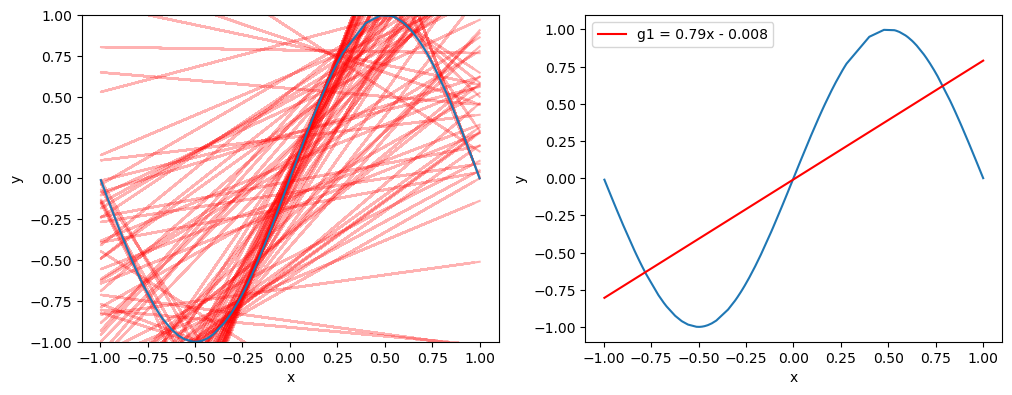

In [109]:
fig, ax1 = plt.subplots(1, 2, figsize=(10,4))
for _, row in table_2.iterrows():
    x_vals = table_2['x_1'].values
    y_vals = row[4] * x_vals + row[5]
    ax1[0].plot(x_vals, y_vals, color='r', alpha=0.3)
plot1 = sns.lineplot(data=table_2, x='x_1', y='y_1', ax=ax1[0])
    
plot2 = sns.lineplot(data=table_2, x='x_1', y='y_1', label='_nolegend_', ax=ax1[1])
x_vals = table_2['x_1'].values
x_vals = np.sort(x_vals)
y_vals = g1[0] * x_vals + g1[1]
plot2.plot(x_vals, y_vals, color='r', label='g1 = 0.79x - 0.008')

ax1[0].set_xlabel(r'x')
ax1[0].set_ylabel(r'y')
ax1[1].set_xlabel(r'x')
ax1[1].set_ylabel(r'y')
ax1[1].legend()
fig.tight_layout()
ax1[0].set_ylim([-1, 1])
plt.show()

$H_{1}$ is a more complex model than $H_{0}$. Since it has a lower bias than the first one, this model fits the data better, however since it has a high variance, the functions in the hypothesis are more fluctuating; a small change in the data set implies the selection of a very different hypothesis from the previous one.

For $H_{0}$ we have that its total error is $E_{H_{0}} = bias0 + variance0 = 0.7277$; for $H_{1}$ we have that $E_{H_{1}} = bias1 + variance1 = 1.7343$. Based on the results of the generalization errors, model $H_{0}$ is better than model $H_{1}$. We can note that the model that best fit the data will not necessarily perform better with new data. 